In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import MARBLE
from MARBLE import plotting, dynamics, geometry


np.random.seed(42)

In [2]:
def get_pos_vel(mus, alpha=0.05):
    X0_range = dynamics.initial_conditions(n, len(mus), area)

    pos, vel = [], []
    for X0, m in zip(X0_range, mus):
        p, v = dynamics.simulate_vanderpol(m, X0, t)
        pos.append(np.vstack(p))
        vel.append(np.vstack(v))

    pos, vel = dynamics.embed_parabola(pos, vel, alpha=alpha)
    return pos, vel

# Generate phase portraits from random initial conditions while varying $\beta_1$

In [6]:
n_mus = 51
t = np.arange(0, 3, 0.5)
n = 100
area = [[-3, -3],[3, 3]]

mus = np.linspace(-1.0, 1.0, n_mus)
pos, vel = get_pos_vel(mus)

/Users/arnaudon/base/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


10000


/Users/arnaudon/code/MARBLE/MARBLE/dynamics.py:20: RuntimeWarning: overflow encountered in double_scalars
  f2 = par["mu"] * (1 - x**2) * y - x
/Users/arnaudon/code/MARBLE/MARBLE/dynamics.py:20: RuntimeWarning: invalid value encountered in double_scalars
  f2 = par["mu"] * (1 - x**2) * y - x


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2580317095227D+01   r2 =  0.2048487852821D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2580317095227D+01   r2 =  0.2048487852821D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2580317095227D+01   r2 =  0.2048487852821D-15
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.2580317095227D+01   r2 =  0.2048487852821D-15
 lsoda--  warning..internal t (=r1) 

(-5.0, 5.0)

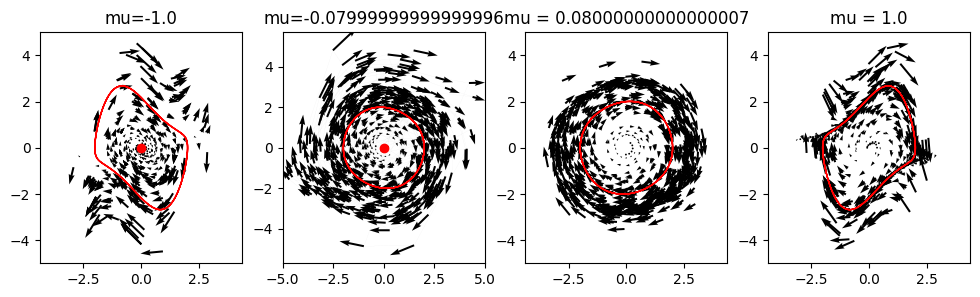

In [7]:
# simulate some long trajectories to plot attractor
t_long = np.arange(0, 100, 0.01)
print(len(t_long))
X0 = dynamics.initial_conditions(1, len(mus), area)
p_long, v_long = [], []
for X0, m in zip(X0, mus):
    p, v = dynamics.simulate_vanderpol(m, X0, t_long)
    p_long.append(p[0][-2000:])
    v_long.append(v[0][-2000:])

# plot trajectories and attractor
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
plotting.plot_phase_portrait(pos[0][:, :2], 0.05*vel[0][:, :2], ax[0], lw=.01, style='>')
ax[0].scatter(0, 0, c='r', zorder=10)
ax[0].plot(-p_long[-1][:, 0], p_long[-1][:, 1], '-', c='r', lw=1, zorder=10)
ax[0].axis('equal')
ax[0].set_title(f"mu={mus[0]}")
ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-5, 5)


plotting.plot_phase_portrait(pos[n_mus//2-2][:, :2], 0.05*vel[n_mus//2-2][:, :2], ax[1], lw=.01, style='->')
ax[1].scatter(0, 0, c='r', zorder=10)
ax[1].plot(-p_long[n_mus//2+2][:, 0], p_long[n_mus//2+2][:, 1], c='r', lw=1, zorder=10)
ax[1].axis('equal')
ax[1].set_title(f"mu={mus[n_mus//2-2]}")
ax[1].set_xlim(-5, 5)
ax[1].set_ylim(-5, 5)

plotting.plot_phase_portrait(pos[n_mus//2+2][:, :2], 0.05*vel[n_mus//2+2][:, :2], ax[2], lw=.01, style='>')
ax[2].plot(p_long[n_mus//2+2][:, 0], p_long[n_mus//2+2][:, 1], c='r', lw=1, zorder=10)
ax[2].axis('equal')
ax[2].set_title(f"mu = {mus[n_mus//2+2]}")
ax[2].set_xlim(-5, 5)
ax[2].set_ylim(-5, 5)

plotting.plot_phase_portrait(pos[-1][:, :2], 0.05*vel[-1][:, :2], ax[3],  lw=.01, style='>')
ax[3].plot(p_long[-1][:, 0], p_long[-1][:, 1], '-', c='r', lw=1, zorder=10)
ax[3].axis('equal')
ax[3].set_title(f"mu = {mus[-1]}")
ax[3].set_xlim(-5, 5)
ax[3].set_ylim(-5, 5)

In [ ]:
data = MARBLE.construct_dataset(pos, features=vel, k=20, stop_crit=0.03, vector=False)

# Run MARBLE

In [8]:

params = {'epochs': 50, #optimisation epochs
       'order': 2, #order of derivatives
       'hidden_channels': 32, #number of internal dimensions in MLP
       'out_channels': 5,
       'inner_product_features': True,
      }

model = MARBLE.net(data, params=params)
model.run_training(data)

---- Embedding dimension: 3
---- Signal dimension: 3

Vector computations are disabled

---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 

---- Settings: 

epochs : 50
order : 2
hidden_channels : 32
out_channels : 5
inner_product_features : True
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  13
---- Total number of parameters:  731

---- Training network ...

Epoch: 0, Training loss: 1.362320, Validation loss: 1.3154, lr: 0.0100 *
Epoch: 1, Training loss: 1.201017, Validation loss: 1.1393, lr: 0.0100 *
Epoch: 2, Training loss: 1.128500, Validation loss: 1.1700, lr: 0.0100
Epoch: 3, Training loss: 1.106477, Validation loss: 1.1247, lr: 0.0100 *
Epoch: 4, Training loss: 1.088858, Validation loss: 1.1373, lr: 0.0100

Performed umap embedding on embedded results.
Performed PCA embedding on embedded results.


<Axes: >

<Figure size 640x480 with 0 Axes>

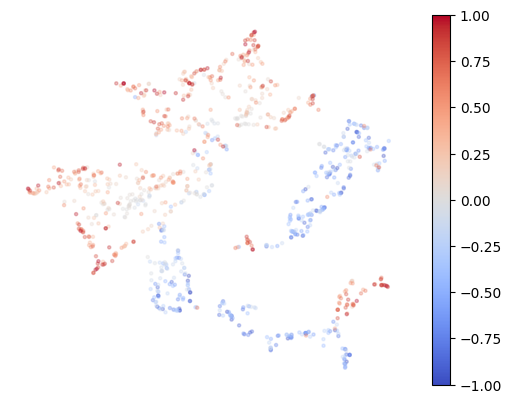

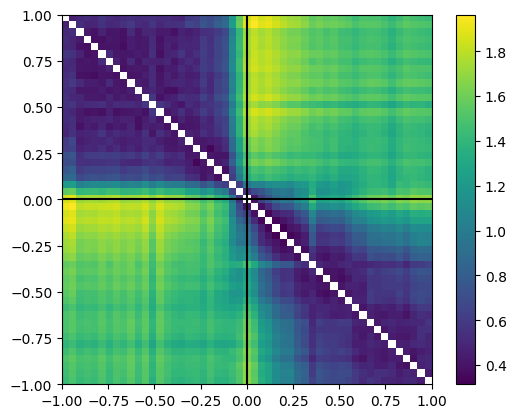

<Figure size 640x480 with 0 Axes>

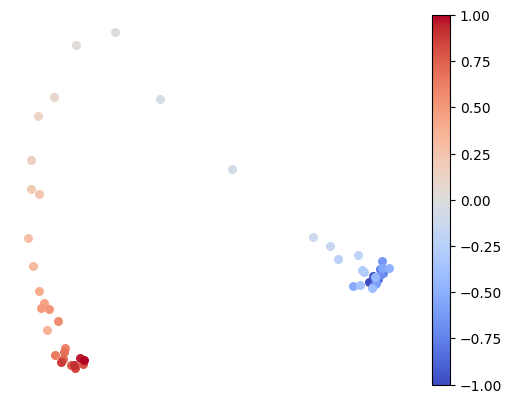

In [24]:
data = model.evaluate(data)
data = MARBLE.cluster_embeddings(data)#, n_clusters=10)

plt.figure()
plotting.embedding(data, mus[data.y.numpy().astype(int)])

plt.figure()
d= data.dist.copy()
d += np.diag(np.diag(d) *np.nan)
im = plt.imshow(d, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.colorbar(im)

manifold = PCA(n_components=20)
manifold.fit(data.dist)
print(manifold.explained_variance_ratio_)
emb_MDS, _ = geometry.embed(data.dist, embed_typ='PCA', dim_emb=10, manifold=manifold)

plt.figure()
plotting.embedding(emb_MDS[:, :2], mus, s=30, alpha=1)

In [25]:
#data = MARBLE.cluster_embeddings(data, n_clusters=5)



In [ ]:
plotting.embedding(data)#, labels=data.clusters['labels'])

Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed 

Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed 

Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed PCA embedding on embedded results.
Performed 

KeyboardInterrupt: 

/Users/arnaudon/base/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/Users/arnaudon/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


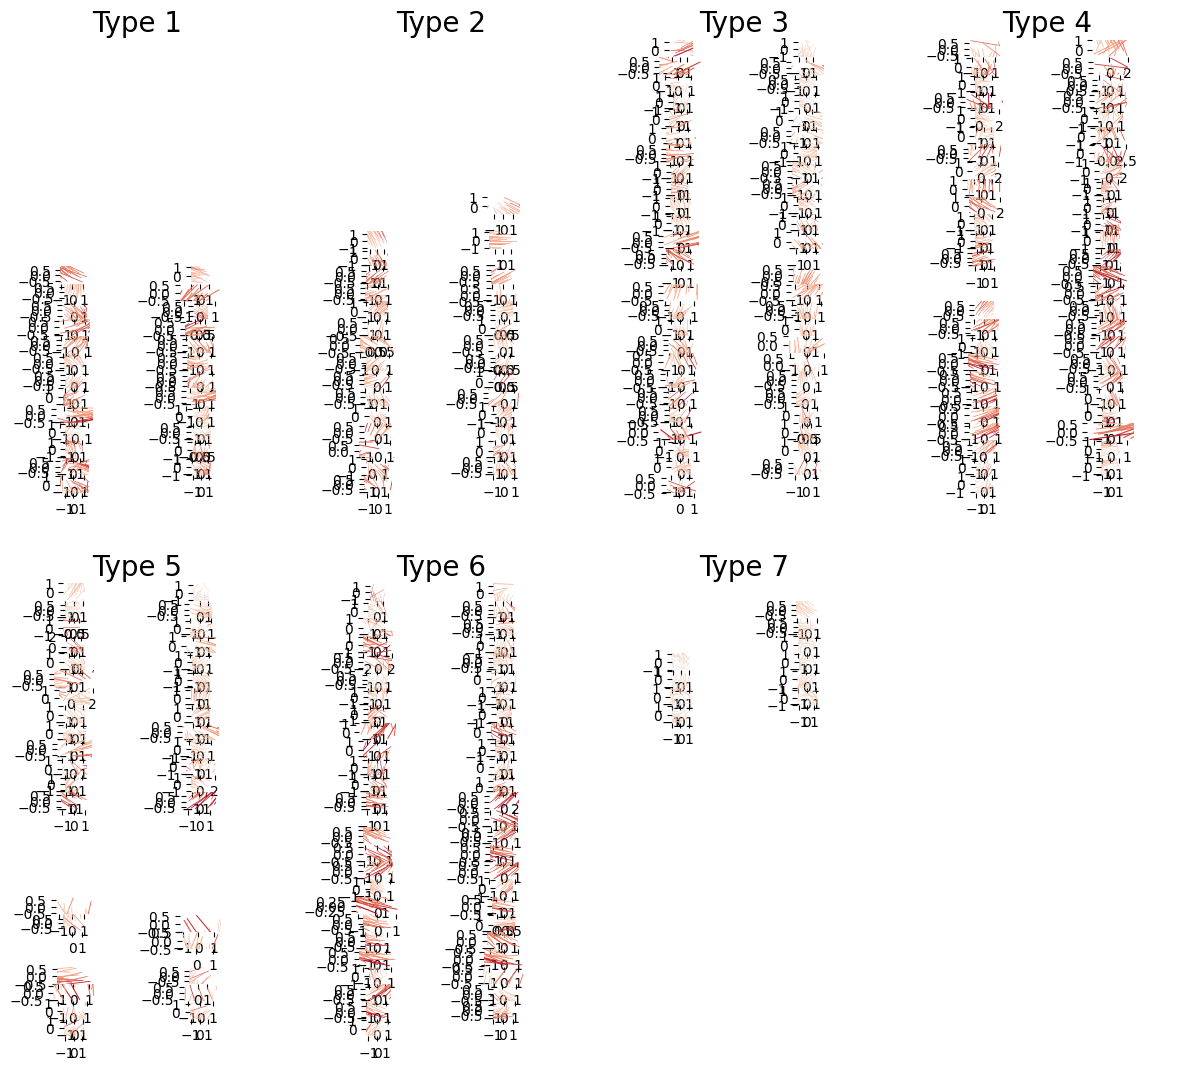

In [27]:
plotting.neighbourhoods(data)

# Zoom on mu=0

In [28]:
mus = np.linspace(-0.1, 0.1, n_mus)
pos, vel = get_pos_vel(mus)

data = MARBLE.construct_dataset(pos, features=vel, graph_type='cknn', k=20, stop_crit=0.03, vector=False)
model = MARBLE.net(data, params=params)
model.run_training(data)

/Users/arnaudon/base/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


---- Embedding dimension: 3
---- Signal dimension: 3

Vector computations are disabled

---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 

---- Settings: 

epochs : 50
order : 2
hidden_channels : 32
out_channels : 5
inner_product_features : True
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  13
---- Total number of parameters:  731

---- Training network ...

Epoch: 0, Training loss: 1.233292, Validation loss: 1.1316, lr: 0.0100 *
Epoch: 1, Training loss: 1.092650, Validation loss: 1.0912, lr: 0.0100 *
Epoch: 2, Training loss: 1.073698, Validation loss: 1.0775, lr: 0.0100 *
Epoch: 3, Training loss: 1.066657, Validation loss: 1.0869, lr: 0.0100
Epoch: 4, Training loss: 1.065123, Validation loss: 1.0732, lr: 0.0100

Performed umap embedding on embedded results.
Performed PCA embedding on embedded results.


<Axes: >

<Figure size 640x480 with 0 Axes>

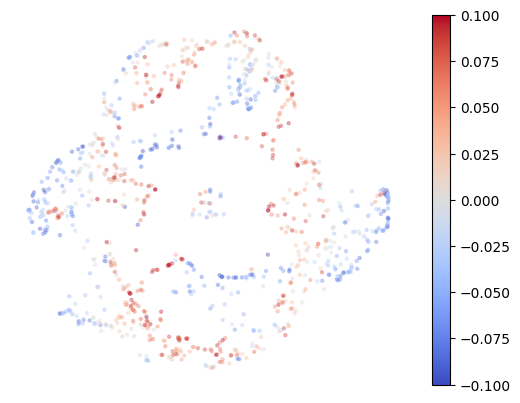

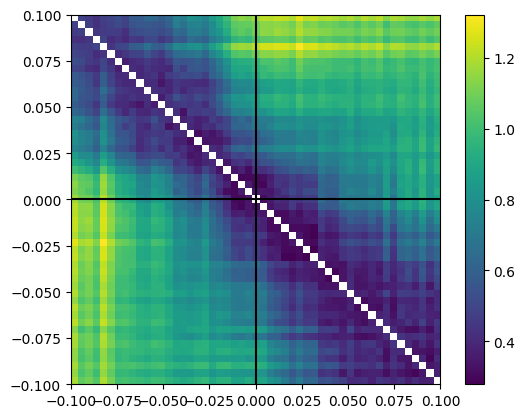

<Figure size 640x480 with 0 Axes>

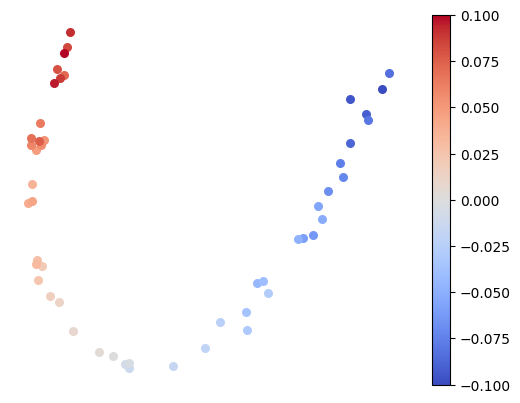

In [29]:
data = model.evaluate(data)
data = MARBLE.cluster_embeddings(data)

plt.figure()
plotting.embedding(data, mus[data.y.numpy().astype(int)])

d= data.dist.copy()
d += np.diag(np.diag(d) *np.nan)
plt.figure()
im = plt.imshow(d, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.colorbar(im)


manifold = PCA(n_components=20)
manifold.fit(data.dist)
print(manifold.explained_variance_ratio_)
emb_MDS, _ = geometry.embed(data.dist, embed_typ='PCA', dim_emb=10, manifold=manifold)

plt.figure()
plotting.embedding(emb_MDS[:, :2], mus, s=30, alpha=1)

# Change of parabola curvature

In [74]:
def get_pos_vel(mus, alpha=0.05):
    X0_range = dynamics.initial_conditions(n, len(mus), area)

    pos, vel = [], []
    for X0, m in zip(X0_range, mus):
        p, v = dynamics.simulate_vanderpol(m, X0, t)
        a = np.random.uniform(-alpha, alpha)
        p, v = dynamics.embed_parabola(p, v, alpha=a)
        pos.append(np.vstack(p))
        vel.append(np.vstack(v))
   
    return pos, vel

In [78]:
mus = np.linspace(-0.1, 0.1, n_mus)
pos, vel = get_pos_vel(mus, alpha=0.1)

data = MARBLE.construct_dataset(pos, features=vel, graph_type='cknn', k=20, stop_crit=0.03, vector=False)


params['inner_product_features'] = True


model = MARBLE.net(data, params=params)
model.run_training(data)

0.08005440877954462
0.07306572090623606
-0.023147301139112078
0.04011693814886222
-0.0925740589739525
0.0002652438350916331
-0.07722138261932388


/Users/arnaudon/base/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


0.04673796558070836
-0.012635839454781722
-0.03460272226886407
0.05030032152098124
-0.04737627058440761
-0.0029771337715483737
-0.09868787593576805
-0.0989457700056064
0.013531763227101437
-0.029405381913710546
-0.024986676161116564
-0.026980587946218007
-0.03819420439826893
-0.06582053742073063
0.09582497255764971
0.055013853829336185
0.09443107282252414
0.005092575630056079
-0.05230913695499513
-0.0029722855094838074
0.01784857482333657
9.651086765501138e-05
-0.014065044785147876
-0.049830192345057416
-0.0885140839554693
0.02867417188646651
-0.04970097283037516
-0.06169838508090273
0.0021394749479406866
-0.023854841797322626
0.08338345571484015
-0.0895549993628853
-0.024492057917693294
-0.00045571541386013603
0.015868078626097654
0.06150944650477316
0.0785006093990451
-0.005570605075591789
-0.08026244837695984
0.04548904280062613
-0.0021911238323277793
0.04049030632066586
-0.02853003677699438
-0.06124736211940343
---- Embedding dimension: 3
---- Signal dimension: 3

Vector computatio

Performed umap embedding on embedded results.
Performed PCA embedding on embedded results.


<Axes: >

<Figure size 640x480 with 0 Axes>

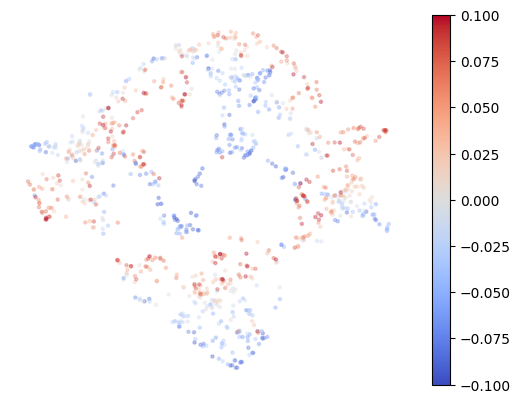

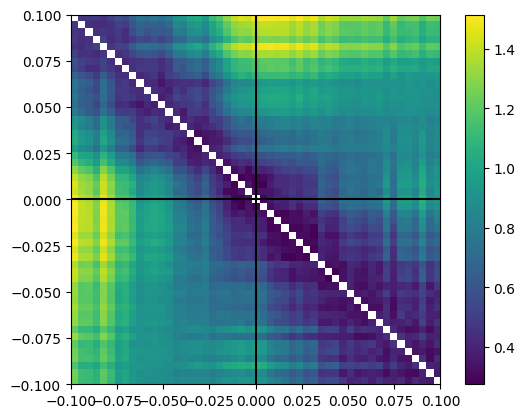

<Figure size 640x480 with 0 Axes>

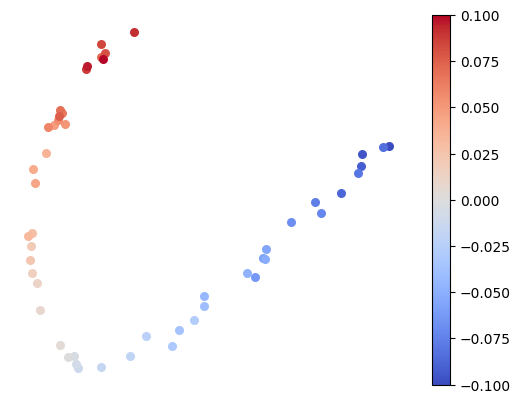

In [79]:
data = model.evaluate(data)
data = MARBLE.cluster_embeddings(data)

plt.figure()
plotting.embedding(data, mus[data.y.numpy().astype(int)])

d= data.dist.copy()
d += np.diag(np.diag(d) *np.nan)
plt.figure()
im = plt.imshow(d, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.colorbar(im)

manifold = PCA(n_components=20)
manifold.fit(data.dist)
print(manifold.explained_variance_ratio_)
emb_MDS, _ = geometry.embed(data.dist, embed_typ='PCA', dim_emb=10, manifold=manifold)

plt.figure()
plotting.embedding(emb_MDS[:, :2], mus, s=30, alpha=1)

# again but without geometry aware

In [80]:
params['inner_product_features'] = False


model = MARBLE.net(data, params=params)
model.run_training(data)


---- Settings: 

epochs : 50
order : 2
hidden_channels : 32
out_channels : 5
inner_product_features : False
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  39
---- Total number of parameters:  1446

---- Training network ...

Epoch: 0, Training loss: 1.173980, Validation loss: 1.0886, lr: 0.0100 *
Epoch: 1, Training loss: 1.077705, Validation loss: 1.0953, lr: 0.0100
Epoch: 2, Training loss: 1.064659, Validation loss: 1.0647, lr: 0.0100 *
Epoch: 3, Training loss: 1.037837, Validation loss: 1.0405, lr: 0.0100 *
Epoch: 4, Training loss: 1.015111, Validation loss: 1.0367, lr: 0.0100 *
Epoch: 5, Training loss: 1.004343, Validation loss: 1.0119, lr: 0.0100 *
Epoch: 6, Training loss: 1.000820, Validation loss: 1.0165, lr: 0.0100
Epoch: 7, Traini

Performed umap embedding on embedded results.
[0.61927799 0.15876762 0.03370091 0.02120563 0.01584035 0.01018966
 0.0086903  0.00694957 0.00638864 0.00579386 0.00540262 0.00515966
 0.00495369 0.00465662 0.0044584  0.00432818 0.00388679 0.00379097
 0.00352563 0.00339576]
Performed PCA embedding on embedded results.


<Axes: >

<Figure size 640x480 with 0 Axes>

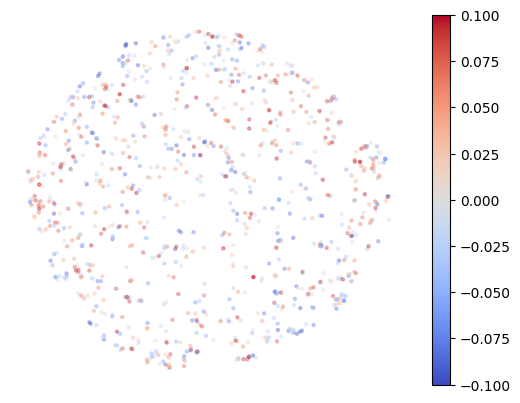

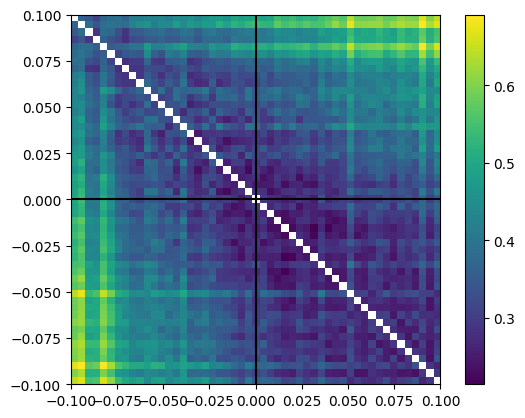

<Figure size 640x480 with 0 Axes>

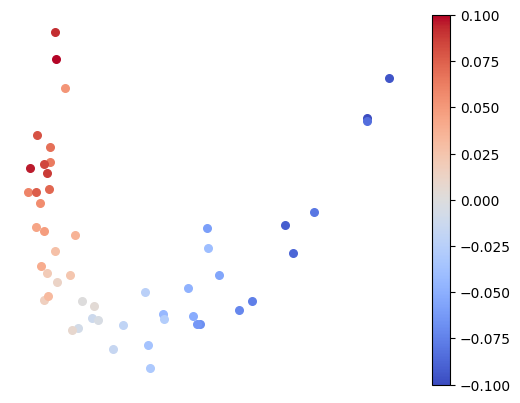

In [97]:
data = model.evaluate(data)
data = MARBLE.cluster_embeddings(data)

plt.figure()
plotting.embedding(data, mus[data.y.numpy().astype(int)])

d= data.dist.copy()
d += np.diag(np.diag(d) *np.nan)
plt.figure()
im = plt.imshow(d, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')

plt.colorbar(im)


manifold = PCA(n_components=20)
manifold.fit(data.dist)
print(manifold.explained_variance_ratio_)
emb_MDS, _ = geometry.embed(data.dist, embed_typ='PCA', dim_emb=10, manifold=manifold)

plt.figure()
plotting.embedding(emb_MDS[:, :2], mus, s=30, alpha=1)